In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing Data
wine = pd.read_csv('White Wine Quality.csv',delimiter = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Description of data like mean, midean
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
# Check Missing Values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

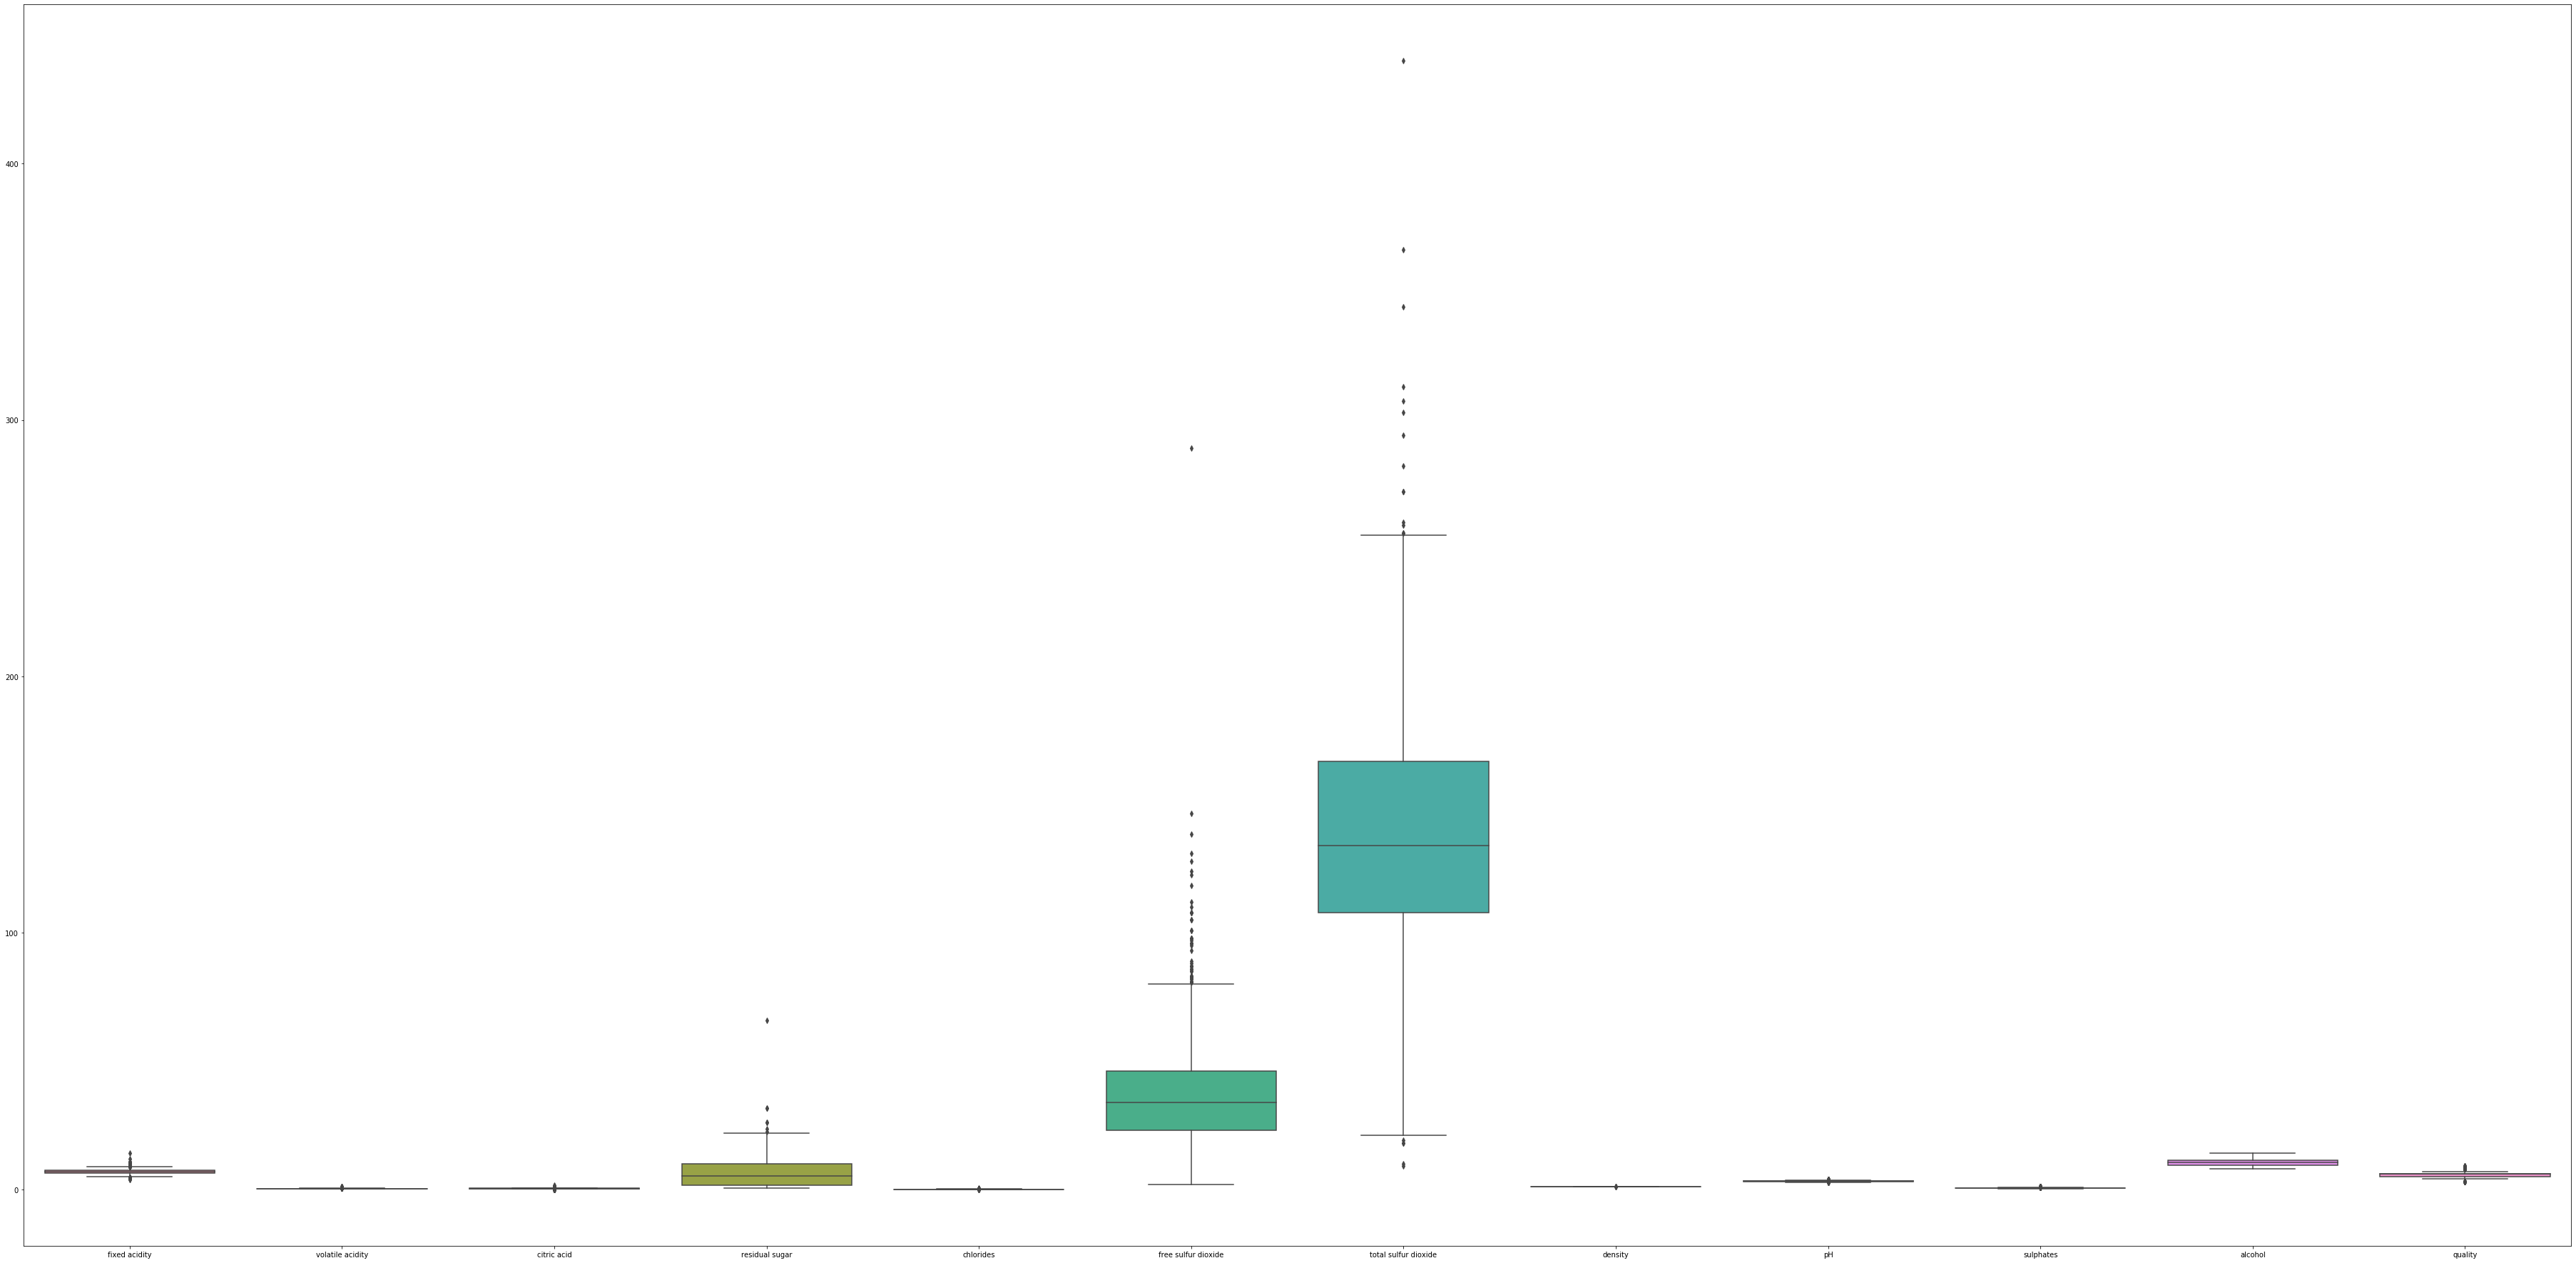

In [5]:
# Sizing of Graph
fig, ax = plt.subplots()
fig.set_size_inches(64,32)

# Box Plot Graph to check Outliers
sns.boxplot(data=wine)

In [6]:
# This function used to remove detect the outliers
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3-Q1
        LTV=Q1-1.5*IQR
        UTV=Q3+1.5*IQR
        df[i]=df[i].mask(df[i]<LTV,LTV)
        df[i]=df[i].mask(df[i]>UTV,UTV)
    return df
wbcd = outlier_detect(wine) # Remove outliers

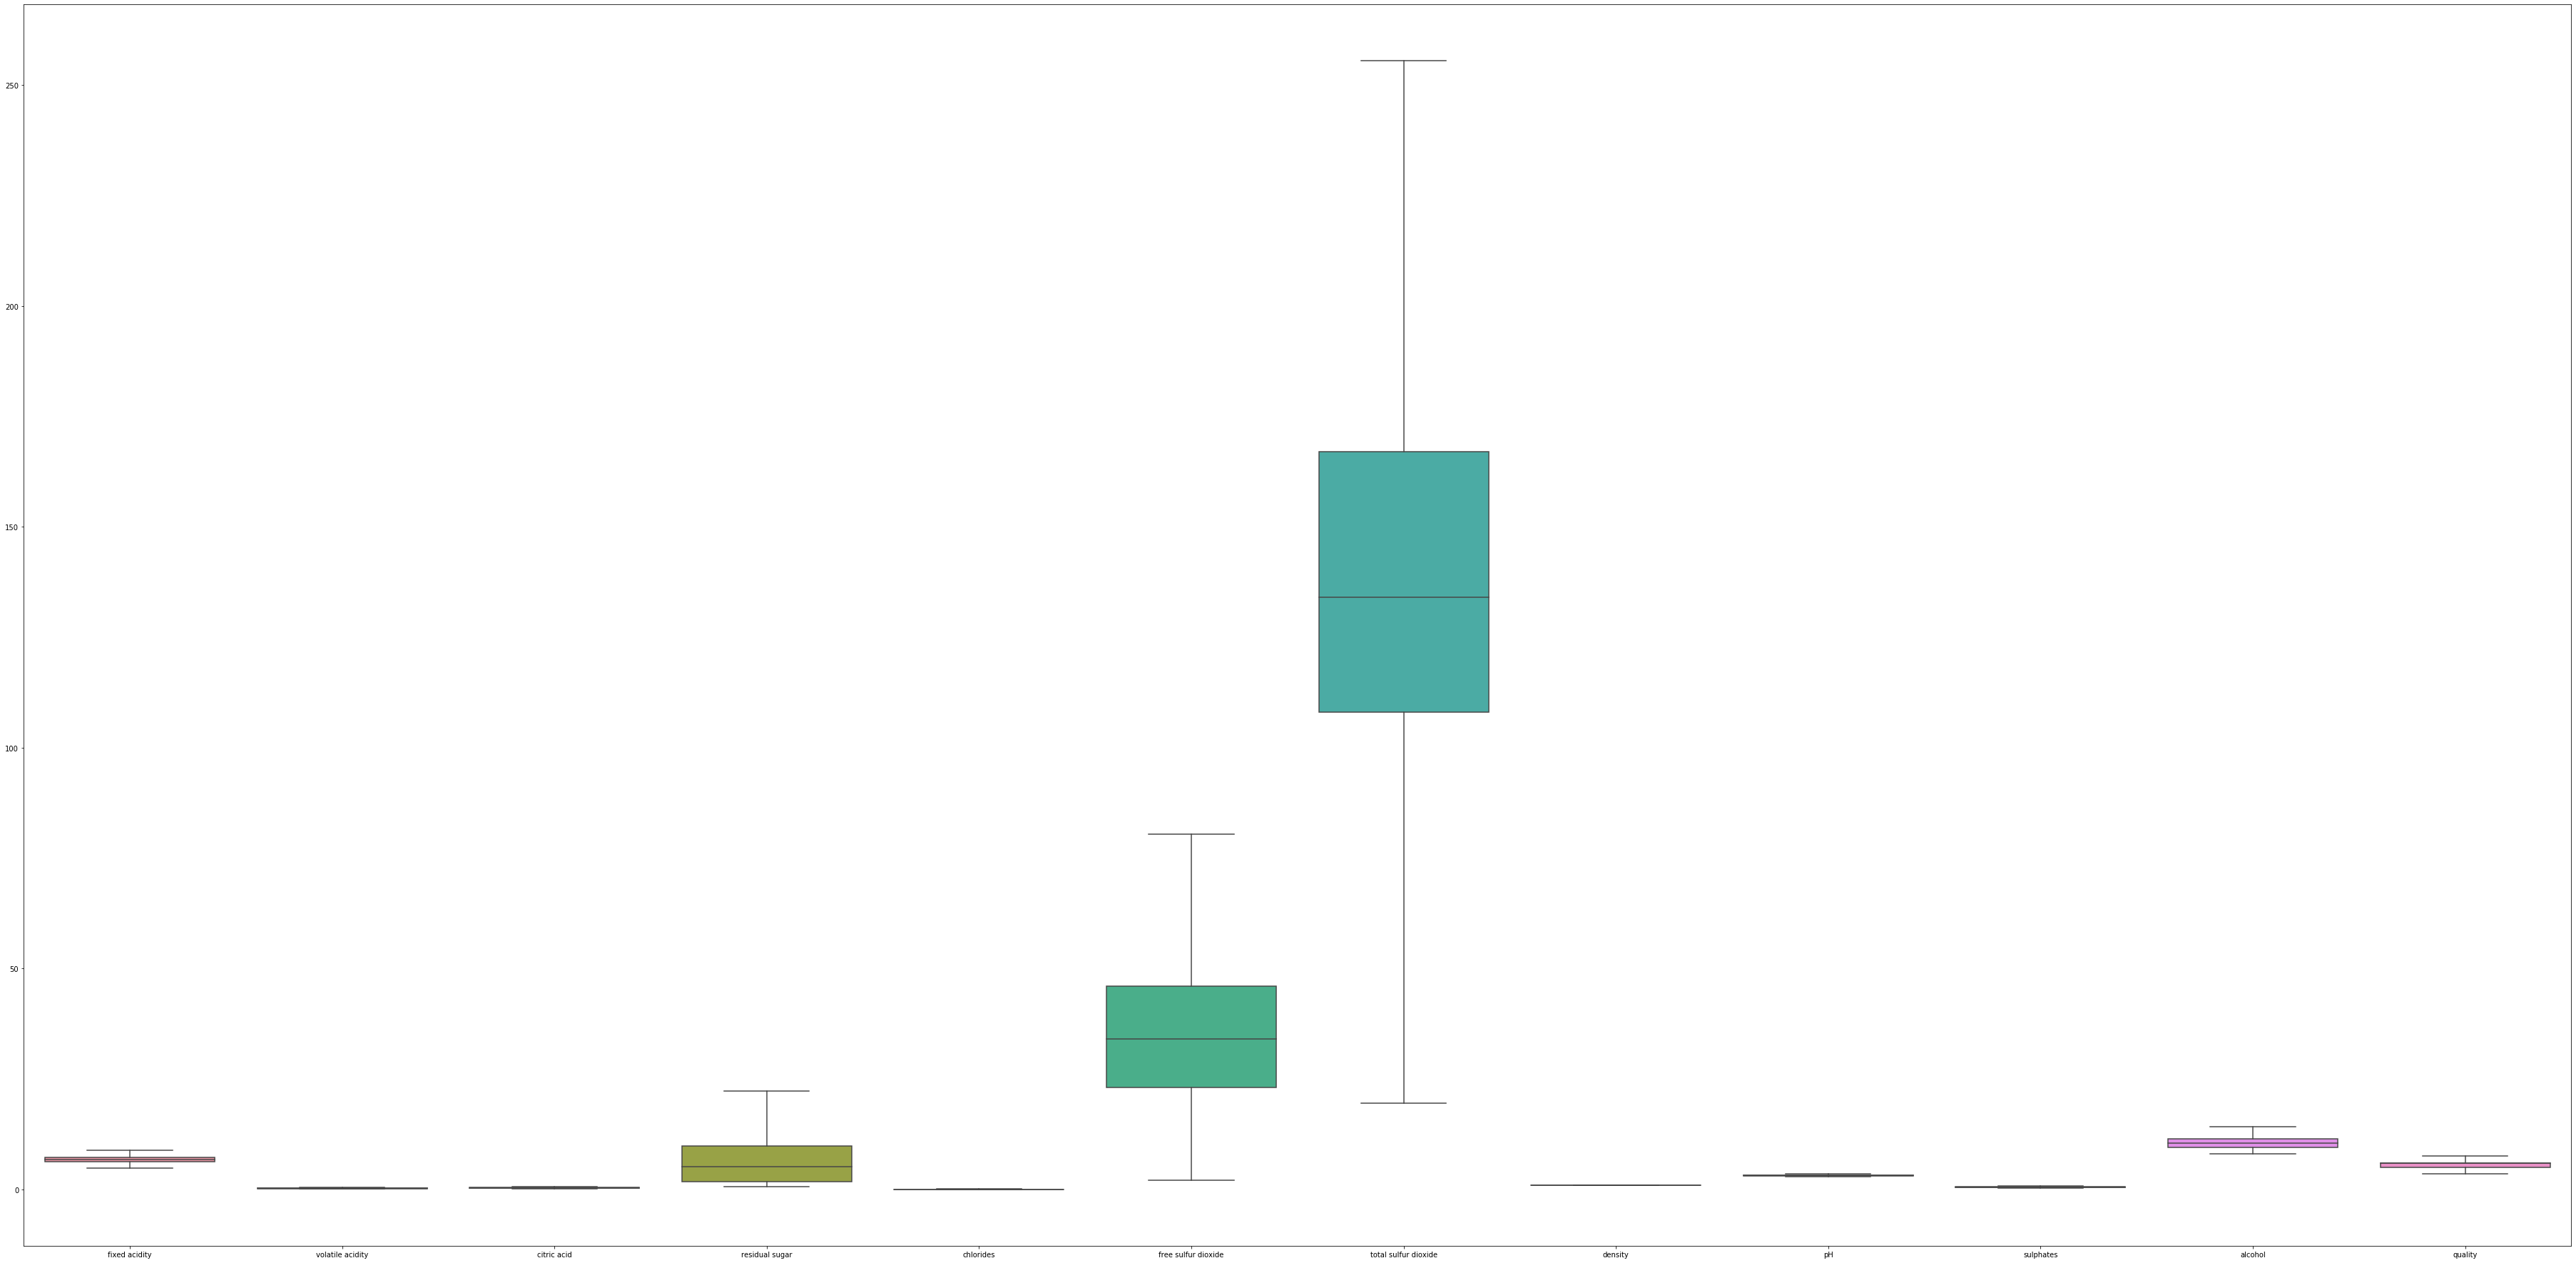

In [7]:
# Sizing of Graph
fig, ax = plt.subplots()
fig.set_size_inches(64,32)

# Box Plot Graph to checking Outliers are Removed
sns.boxplot(data=wine)

In [8]:
#Taking name of columns
names = wine.columns
names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
# Standardization the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine = scaler.fit_transform(wine)

In [10]:
wine=pd.DataFrame(wine, columns=names)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.196181,-0.047322,0.287973,2.874658,0.131934,0.618390,0.757168,2.399966,-1.271226,-0.350931,-1.393152,0.166786
1,-0.678892,0.296739,0.094728,-0.958689,0.486120,-1.318331,-0.148568,-0.005749,0.767042,0.020714,-0.824276,0.166786
2,1.571295,0.067365,0.674462,0.105014,0.574667,-0.318733,-0.982799,0.372291,0.495273,-0.443842,-0.336667,0.166786
3,0.446201,-0.506069,-0.098516,0.426133,1.283039,0.743340,1.138530,0.544128,0.019677,-0.815487,-0.499203,0.166786
4,0.446201,-0.506069,-0.098516,0.426133,1.283039,0.743340,1.138530,0.544128,0.019677,-0.815487,-0.499203,0.166786


In [11]:
# Create X Data
X = wine.drop('quality', axis = 1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.196181,-0.047322,0.287973,2.874658,0.131934,0.618390,0.757168,2.399966,-1.271226,-0.350931,-1.393152
1,-0.678892,0.296739,0.094728,-0.958689,0.486120,-1.318331,-0.148568,-0.005749,0.767042,0.020714,-0.824276
2,1.571295,0.067365,0.674462,0.105014,0.574667,-0.318733,-0.982799,0.372291,0.495273,-0.443842,-0.336667
3,0.446201,-0.506069,-0.098516,0.426133,1.283039,0.743340,1.138530,0.544128,0.019677,-0.815487,-0.499203
4,0.446201,-0.506069,-0.098516,0.426133,1.283039,0.743340,1.138530,0.544128,0.019677,-0.815487,-0.499203


In [12]:
# Create y Data
y = wine.iloc[:,11:12]
y.head()

,quality
0,0.166786
1,0.166786
2,0.166786
3,0.166786
4,0.166786


In [13]:
# Spliting Training and Testing Train Size = 80 and Test Size = 20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

# Linear Regression Algrothim

In [14]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Model Bulding
l = LinearRegression()

# Fitting Model
l.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# Predicting the test set variables
linear = l.predict(X_test)
linear

array([[-3.83595514e-01],
       [-5.51178527e-01],
       [ 3.04039737e-01],
       [ 1.06208944e+00],
       [ 8.03710883e-02],
       [-1.26505667e+00],
       [ 7.92694264e-01],
       [ 4.40603506e-01],
       [ 7.16253511e-02],
       [-5.74726508e-02],
       [-1.75814183e-01],
       [-5.16393643e-01],
       [-9.16325364e-01],
       [-3.69953540e-01],
       [ 4.01621294e-01],
       [-1.65623927e-01],
       [ 5.44697495e-01],
       [-4.59948111e-01],
       [ 1.04472586e+00],
       [ 3.49437969e-01],
       [ 8.39936429e-02],
       [ 4.26562975e-01],
       [ 9.33275558e-02],
       [-3.57294641e-02],
       [-1.05662988e-01],
       [ 5.98556525e-01],
       [-1.16887645e+00],
       [-8.34105528e-01],
       [ 5.95166173e-01],
       [-2.13451316e-01],
       [-5.77744302e-01],
       [-9.63486193e-02],
       [ 4.44560975e-01],
       [ 5.46373813e-01],
       [-6.03820505e-01],
       [ 3.18555572e-01],
       [ 3.27955894e-01],
       [-4.29337272e-01],
       [ 3.3

In [16]:
from sklearn.metrics import r2_score
Linear_Regression = r2_score(y_test,linear)
Linear_Regression

0.28145428224713576

# SGD Regression Algrothim

In [17]:
# Importing Stochastic Gradient Descent Algrothim
from sklearn.linear_model import SGDRegressor

# Model Bulding
sgd=SGDRegressor()

# Fitting Model
sgd.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [18]:
# Predicting the test set variables
sgd=sgd.predict(X_test)
sgd

array([-4.56309573e-01, -5.73355514e-01,  3.16308907e-01,  1.05568127e+00,
        6.13336172e-02, -9.75443268e-01,  7.98941665e-01,  4.08905798e-01,
        1.08168929e-01,  1.06555018e-02, -1.14045571e-01, -4.21871504e-01,
       -9.43977581e-01, -3.30832753e-01,  4.18200997e-01, -1.73869181e-01,
        5.07950987e-01, -5.09103146e-01,  1.03107261e+00,  3.35955596e-01,
        5.75273606e-02,  3.39900910e-01,  5.20352815e-02,  8.42739638e-03,
       -1.14304553e-01,  5.43920822e-01, -1.07992683e+00, -8.88556827e-01,
        5.34485094e-01, -2.04604496e-01, -5.24159500e-01, -1.37677378e-01,
        4.49287439e-01,  4.68297459e-01, -5.84523879e-01,  2.71083100e-01,
        3.41699516e-01, -3.50385985e-01,  3.38158027e-01, -1.42244253e-01,
        4.60959623e-01,  2.23326139e-01, -8.02639666e-02, -1.65742313e-01,
       -5.15538313e-01,  6.82264591e-01, -6.92012209e-01,  5.76827533e-01,
        5.68882767e-01, -4.24973019e-01,  9.61929592e-01,  4.40476025e-01,
       -5.72730452e-01, -

In [19]:
SGD_Regression = r2_score(y_test,sgd)
SGD_Regression

0.2669519516290898

# Ridge Regression Algrothim

In [20]:
# Importing Ridge Regression
from sklearn.linear_model import Ridge

# Model Bulding
ridgeReg = Ridge(alpha=0.5, normalize=True)

# Fitting Model
ridgeReg.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [21]:
# Predicting the test set variables
ridge = ridgeReg.predict(X_test)
ridge

array([[-2.66266643e-01],
       [-4.96377893e-01],
       [ 2.44247733e-01],
       [ 7.60264469e-01],
       [-5.90654691e-02],
       [-6.47013939e-01],
       [ 4.42867807e-01],
       [ 3.38057024e-01],
       [ 1.41231845e-01],
       [-8.34076055e-02],
       [-8.18972071e-02],
       [-4.54480725e-01],
       [-5.04163264e-01],
       [-2.21425860e-01],
       [ 3.72277735e-01],
       [-2.18238349e-01],
       [ 4.35530363e-01],
       [-2.71628591e-01],
       [ 7.78233234e-01],
       [ 3.24229834e-01],
       [ 8.84303100e-02],
       [ 2.23620093e-01],
       [-2.18024676e-02],
       [-1.28056461e-01],
       [-3.84124192e-03],
       [ 3.09969134e-01],
       [-7.32980153e-01],
       [-5.65134980e-01],
       [ 4.50301000e-01],
       [ 2.58883295e-02],
       [-4.73568518e-01],
       [-1.36354732e-02],
       [ 3.92877849e-01],
       [ 3.52863298e-01],
       [-4.29255179e-01],
       [ 2.58480579e-01],
       [ 2.56804476e-01],
       [-4.24671501e-01],
       [ 2.9

In [22]:
Ridge_Regression = r2_score(y_test,ridge)
Ridge_Regression

0.22466328395334534

# Lasso Regression Algrothim

In [23]:
# Importing Lasso Regression
from sklearn.linear_model import Lasso

# Model Bulding
lassoReg = Lasso(alpha=0.1, normalize=True)

# Fitting Model
lassoReg.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [24]:
# Predicting the test set variables
lasso = lassoReg.predict(X_test)
lasso

array([0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536

In [25]:
Lasso_Regression = r2_score(y_test,lasso)
Lasso_Regression

-0.005203109638731718

# Elastic Net Regression Algorthim

In [26]:
# Importing Elastic Net Regression
from sklearn.linear_model import ElasticNet

# Model Bulding
Elreg = ElasticNet(random_state=0)
        
# Fitting Model
Elreg.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
# Predicting the test set variables
net = Elreg.predict(X_test)
net

array([0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536891,
       0.01536891, 0.01536891, 0.01536891, 0.01536891, 0.01536

In [28]:
Elastic_Net_Regression = r2_score(y_test,net)
Elastic_Net_Regression

-0.005203109638731718

# Decision Tree Regression Algorthim

In [29]:
# Importing Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Model Building
dtr = DecisionTreeRegressor(max_depth=5,random_state = 0)

# Fitting Model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [30]:
# Predicting the test set variables
dt = dtr.predict(X_test)
dt

array([ 0.46580435, -0.61709464,  0.39680013,  1.0085508 , -0.06427356,
       -0.96837607,  0.26645881,  0.74697083,  0.35831411, -0.4462015 ,
       -0.06427356,  1.31501636, -0.61709464, -0.4462015 ,  0.74697083,
        0.12951966,  0.35831411, -0.06427356,  1.0085508 ,  0.35831411,
        0.12951966,  0.39680013, -0.46357689,  0.00392785, -0.06427356,
        1.0085508 , -0.61709464, -0.96837607,  0.39680013, -0.1267457 ,
       -0.61709464,  0.35831411,  0.35831411,  0.74697083, -0.61709464,
        0.79736888,  0.39680013,  1.31501636,  0.74697083, -0.06427356,
        0.12951966, -1.6871275 ,  0.12951966,  0.05009597, -0.61709464,
        0.74697083, -1.24238072,  1.0085508 ,  1.0085508 , -0.1267457 ,
        1.0085508 ,  0.39680013, -1.62732384, -0.4462015 , -0.74450787,
        0.00392785, -0.06427356,  0.74697083, -0.96837607,  0.74697083,
       -0.46357689, -0.4462015 ,  0.35831411,  0.00392785,  0.74697083,
        0.39680013, -0.4462015 , -0.61709464, -0.61709464, -0.44

In [31]:
Decision_Tree_Regression = r2_score(y_test,dt)
Decision_Tree_Regression

0.26005168023838654

# Random Forest Regression Algorthim

In [32]:
# Improting Random Forest Algorthim
from sklearn.ensemble import RandomForestRegressor

# Model Bulding
rfr = RandomForestRegressor(max_depth=5,n_estimators = 10, random_state = 0)

# Fitting Model
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [33]:
# Predicting the test set variables
rf = rfr.predict(X_test)
rf

array([-6.78693063e-01, -6.19205738e-01,  1.94228258e-01,  9.73174554e-01,
       -3.63278130e-01, -6.08046803e-01,  4.28605885e-01,  6.54409273e-01,
        1.64408040e-01, -4.62873852e-01, -4.05895101e-01,  9.43445411e-01,
       -1.00480911e+00, -3.57017125e-01,  7.50644202e-01,  6.98376470e-02,
        4.45369177e-01, -5.63960542e-01,  8.93226934e-01,  4.66906491e-01,
        6.98376470e-02,  3.64966125e-01, -7.02147388e-02,  2.68829054e-01,
       -1.90397420e-01,  1.02277007e+00, -6.99557997e-01, -8.07249849e-01,
        3.56541093e-01, -1.69460031e-03, -6.34281234e-01,  2.68934162e-02,
        5.48865540e-01,  6.12413328e-01, -6.34281234e-01,  6.25367081e-01,
        2.55982984e-01,  1.27026352e+00,  8.50409874e-01, -7.82786053e-02,
        1.01409527e-01, -6.41554834e-01, -4.75145980e-02,  1.98515461e-01,
       -6.34281234e-01,  5.81288263e-01, -1.16701262e+00,  1.01476462e+00,
        8.21829690e-01, -7.30337861e-02,  1.01763675e+00,  4.41815770e-01,
       -5.18246600e-01, -

In [34]:
Random_Forest_Regression = r2_score(y_test,rf)
Random_Forest_Regression

0.30961646815859334

# Support Vector Regression Algorthim

In [35]:
# Importing Support Vector Machine Linear Regression
from sklearn.svm import SVR

# Model Building
svml = SVR(kernel = 'linear')

# Fitting Model
svml.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
# Predicting the test set variables
svmr = svml.predict(X_test)
svmr

array([-4.58170248e-01, -6.54732516e-01,  2.38030482e-01,  1.05377854e+00,
        4.29330226e-02, -1.24122019e+00,  7.98817041e-01,  4.45197428e-01,
        1.05576351e-01, -1.06146762e-01, -1.60317330e-01, -5.92870562e-01,
       -1.02130951e+00, -4.49482904e-01,  3.48388551e-01, -1.86271670e-01,
        5.69225685e-01, -5.32045496e-01,  1.05774122e+00,  3.81851706e-01,
        6.97898520e-02,  3.77424404e-01,  5.42992546e-02, -4.86979520e-02,
       -4.03717002e-02,  5.31553257e-01, -1.23786546e+00, -8.89439524e-01,
        5.52361541e-01, -1.95395346e-01, -6.43447039e-01, -1.31027061e-01,
        5.24337452e-01,  4.91908278e-01, -7.05901125e-01,  3.10454389e-01,
        2.78724161e-01, -5.54731328e-01,  3.57332174e-01, -7.21195239e-02,
        4.88942925e-01,  1.43351019e-01, -8.03356351e-02, -3.17334913e-01,
       -5.86928720e-01,  7.34202966e-01, -8.01533357e-01,  6.49821240e-01,
        6.73784520e-01, -4.64672132e-01,  1.05954372e+00,  4.49813656e-01,
       -8.05927696e-01, -

In [37]:
SVM_Linear_Regression = r2_score(y_test,svmr)
SVM_Linear_Regression

0.28002610728004473

In [38]:
# Importing Support Vector Machine Gaussion Regression
from sklearn.svm import SVR

# Model Building
svmg = SVR(kernel = 'rbf')

# Fitting Model
svmg.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
# Predicting the test set variables
svmrg = svmg.predict(X_test)
svmrg

array([-6.82205192e-01, -7.97860304e-01,  2.37416160e-01,  9.28885174e-01,
       -5.08309238e-01, -1.48362685e+00,  2.79380998e-01,  3.49819272e-01,
       -1.27824726e-01, -6.63849284e-01, -1.41655363e-01,  9.41266750e-01,
       -1.12914241e+00, -9.11934535e-01,  5.98115050e-01,  1.23249156e-01,
        7.18775769e-01, -7.49578945e-01,  5.86320607e-01,  2.48314928e-01,
        1.42721532e-01,  4.81745304e-01,  1.65471686e-01, -1.70078447e-01,
       -8.99874041e-02,  1.07219901e+00, -1.18933512e+00, -9.02501740e-01,
        6.04729544e-01,  2.75771695e-01, -1.26097513e+00, -3.26892229e-01,
        7.67496696e-01,  5.10362946e-01, -4.69121944e-01,  7.16648169e-01,
       -2.02182801e-03,  1.46299855e+00,  6.54902256e-01,  3.89091099e-01,
        9.01916019e-02, -3.56771803e-01, -1.39162750e-01,  2.67142010e-01,
       -1.17965556e+00,  4.60671424e-01, -9.61548676e-01,  1.42599688e+00,
        6.78131584e-01, -1.05971096e-01,  1.27897624e+00,  2.73398480e-01,
       -5.68997848e-01, -

In [40]:
SVM_Gaussion_Regression = r2_score(y_test,svmrg)
SVM_Gaussion_Regression

0.38723601026627796

In [41]:
# Importing Support Vector Machine Polynomial Regression
from sklearn.svm import SVR

# Model Building
svmp = SVR(kernel = 'poly')

# Fitting Model
svmp.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
# Predicting the test set variables
svmrp = svmp.predict(X_test)
svmrp

array([-2.46778570e-01, -2.09865462e-01,  6.25137528e-01,  1.98946007e+00,
        6.26662295e-02, -1.43650435e+00,  7.37596870e-01,  3.11005992e-01,
        1.04226834e-01, -1.65976239e-01,  4.17822332e-02,  1.78333987e-01,
       -9.29561033e-01, -3.24778397e-01,  2.39815456e-01,  5.37473508e-02,
        3.19016993e-01, -2.35533847e-01,  9.76320946e-01,  1.54631610e-01,
       -1.70282182e-02,  2.16295388e-01,  8.96961804e-02,  1.50336200e-01,
        2.02422070e-01,  2.11773899e+00, -7.82536588e-01, -3.13181739e-01,
        2.77592914e-01,  5.80775940e-02, -6.55467857e-01,  2.88920361e-02,
        3.88236089e-01,  2.54610051e-01, -2.67936688e-01,  1.86651036e-01,
        8.02886803e-02,  7.54080398e-01,  6.16773681e-01,  9.20808351e-02,
        3.62639348e-02,  9.59519242e-02, -2.25736359e-01,  2.48324795e-01,
       -8.45516256e-01,  6.06519198e-01, -6.59279519e-01,  8.68093878e-01,
        3.72576788e-01, -3.01901604e-01,  8.66358108e-01,  3.02183836e-01,
       -1.10905214e+00,  

In [43]:
SVM_Polynomial_Regression = r2_score(y_test,svmrp)
SVM_Polynomial_Regression

0.2559664353791493

In [44]:
# Importing Support Vector Machine Sigmoid Regression
from sklearn.svm import SVR

# Model Building
svms = SVR(kernel = 'sigmoid')

# Fitting Model
svms.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='sigmoid', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
# Predicting the test set variables
svmrs = svms.predict(X_test)
svmrs

array([-1.14434565e+01,  1.18819175e+01,  4.07665540e+00, -1.07220199e+01,
        1.14820280e+01, -1.75706299e+01,  3.33926464e+00, -5.72875616e+00,
       -2.68248736e+00, -1.29053986e+01, -2.56930852e+00, -1.45311366e+01,
       -2.08195218e+01,  1.07662723e+01, -1.04087242e+01,  1.16721231e+01,
       -1.96444498e+01, -9.62864492e+00,  1.67040581e+01,  9.11102502e+00,
       -1.17773642e+01, -3.67427683e+00, -7.51316398e+00,  7.98208211e+00,
       -1.82137567e+01, -2.60695498e+00,  1.19537955e+01,  1.18255068e+01,
       -1.42488211e+00, -8.77673371e+00, -1.70958155e+01, -1.07216869e+01,
       -6.80064305e+00, -3.41840654e+00,  1.62147713e+01, -9.35936358e+00,
       -4.95517523e+00, -4.57049256e+01, -1.00234425e+01, -1.28503359e+01,
       -1.32915346e+01, -9.19850062e+00, -8.04435430e+00,  1.14999803e+01,
       -1.03154977e+01, -5.02713405e+00,  1.66290371e+01,  5.45426340e+00,
        4.67569549e+01, -5.01988257e+00, -3.44206280e+00, -7.91665435e+00,
        4.53213389e+01,  

In [46]:
SVM_Sigmoid_Regression = r2_score(y_test,svmrs)
SVM_Sigmoid_Regression

-801.7713859899712

# Printing R2 Score values

In [47]:
print("Linear Regression",Linear_Regression)
print("SGD Regression",SGD_Regression)
print("Ridge Regression",Ridge_Regression)
print("Lasso Regresion",Lasso_Regression)
print("Elastic Net Regression",Elastic_Net_Regression)
print("Decision Tree Regression",Decision_Tree_Regression)
print("Random Forest Regression",Random_Forest_Regression)
print("SVM_Linear",SVM_Linear_Regression)
print("SVM_Gaussion_Regression",SVM_Gaussion_Regression)
print("SVM_Polynomial_Regression",SVM_Polynomial_Regression)
print("SVM_Sigmoid_Regression",SVM_Sigmoid_Regression)

Linear Regression 0.28145428224713576
SGD Regression 0.2669519516290898
Ridge Regression 0.22466328395334534
Lasso Regresion -0.005203109638731718
Elastic Net Regression -0.005203109638731718
Decision Tree Regression 0.26005168023838654
Random Forest Regression 0.30961646815859334
SVM_Linear 0.28002610728004473
SVM_Gaussion_Regression 0.38723601026627796
SVM_Polynomial_Regression 0.2559664353791493
SVM_Sigmoid_Regression -801.7713859899712
